In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import datasist as ds
import plotly.express as px
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set(rc={'figure.figsize':(10, 10)}, font_scale=1.2)


In [2]:
data = pd.read_csv('predictive_maintenance.csv')

In [3]:
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [4]:
ds.structdata.describe(data)

First five data points


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure



Random five data points


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
3602  3603     M18462    M                301.7                    310.6   
1477  1478     L48657    L                298.3                    309.4   
3379  3380     M18239    M                301.4                    310.7   
6728  6729     L53908    L                301.5                    310.9   
877    878     M15737    M                295.6                    306.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
3602                    1417         45.2              185       0   
1477                    1570         35.6              138       0   
3379                    1459         37.7               40       0   
6728                    1891         23.2              122       0   
877                     1584         33.6               81       0   

     Failure Type  
3602   No Failure  
1477   No Failure  
3379   No Failure  
6728   No Failure  
877    No Failure



Last five data points


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure



Shape of  data set: (10000, 10)


Size of  data set: 100000


Data Types
Note: All Non-numerical features are identified as objects in pandas


Data Type
UDI                         int64
Product ID                 object
Type                       object
Air temperature [K]       float64
Process temperature [K]   float64
Rotational speed [rpm]      int64
Torque [Nm]               float64
Tool wear [min]             int64
Target                      int64
Failure Type               object



Numerical Features in Data set
['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']


Categorical Features in Data set


['Product ID', 'Type', 'Failure Type']



Statistical Description of Columns


UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000



Description of Categorical Features


count unique         top  freq
Product ID    10000  10000      M14860     1
Type          10000      3           L  6000
Failure Type  10000      6  No Failure  9652



Unique class Count of Categorical features




Missing Values in Data


features  missing_counts  missing_percent
0                      UDI               0              0.0
1               Product ID               0              0.0
2                     Type               0              0.0
3      Air temperature [K]               0              0.0
4  Process temperature [K]               0              0.0
5   Rotational speed [rpm]               0              0.0
6              Torque [Nm]               0              0.0
7          Tool wear [min]               0              0.0
8                   Target               0              0.0
9             Failure Type               0              0.0

<AxesSubplot:>

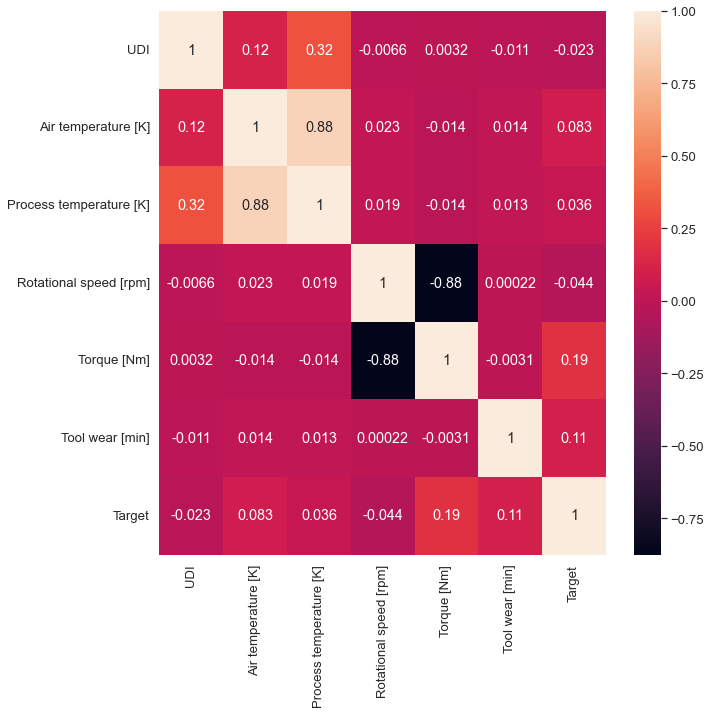

In [5]:
sns.heatmap(data.corr(),annot=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data.value_counts('Type')

Type
L    6000
M    2997
H    1003
dtype: int64

In [8]:
data.value_counts('Failure Type')

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
dtype: int64

In [9]:
data.value_counts('Target')

Target
0    9661
1     339
dtype: int64

In [10]:
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [11]:
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [12]:
fig = px.bar(data.value_counts('Failure Type')).show()

In [13]:
fig = px.bar(data.value_counts('Failure Type').drop('No Failure')).show()

In [14]:
data.corr()

UDI  Air temperature [K]  \
UDI                      1.000000             0.117428   
Air temperature [K]      0.117428             1.000000   
Process temperature [K]  0.324428             0.876107   
Rotational speed [rpm]  -0.006615             0.022670   
Torque [Nm]              0.003207            -0.013778   
Tool wear [min]         -0.010702             0.013853   
Target                  -0.022892             0.082556   

                         Process temperature [K]  Rotational speed [rpm]  \
UDI                                     0.324428               -0.006615   
Air temperature [K]                     0.876107                0.022670   
Process temperature [K]                 1.000000                0.019277   
Rotational speed [rpm]                  0.019277                1.000000   
Torque [Nm]                            -0.014061               -0.875027   
Tool wear [min]                         0.013488                0.000223   
Target                                  0.035946               -0.044188   

                         Torque [Nm]  Tool wear [min]    Target  
UDI                         0.003207        -0.010702 -0.022892  
Air temperature [K]        -0.013778         0.013853  0.082556  
Process temperature [K]    -0.014061         0.013488  0.035946  
Rotational speed [rpm]     -0.875027         0.000223 -0.044188  
Torque [Nm]                 1.000000        -0.003093  0.191321  
Tool wear [min]            -0.003093         1.000000  0.105448  
Target                      0.191321         0.105448  1.000000

In [15]:
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

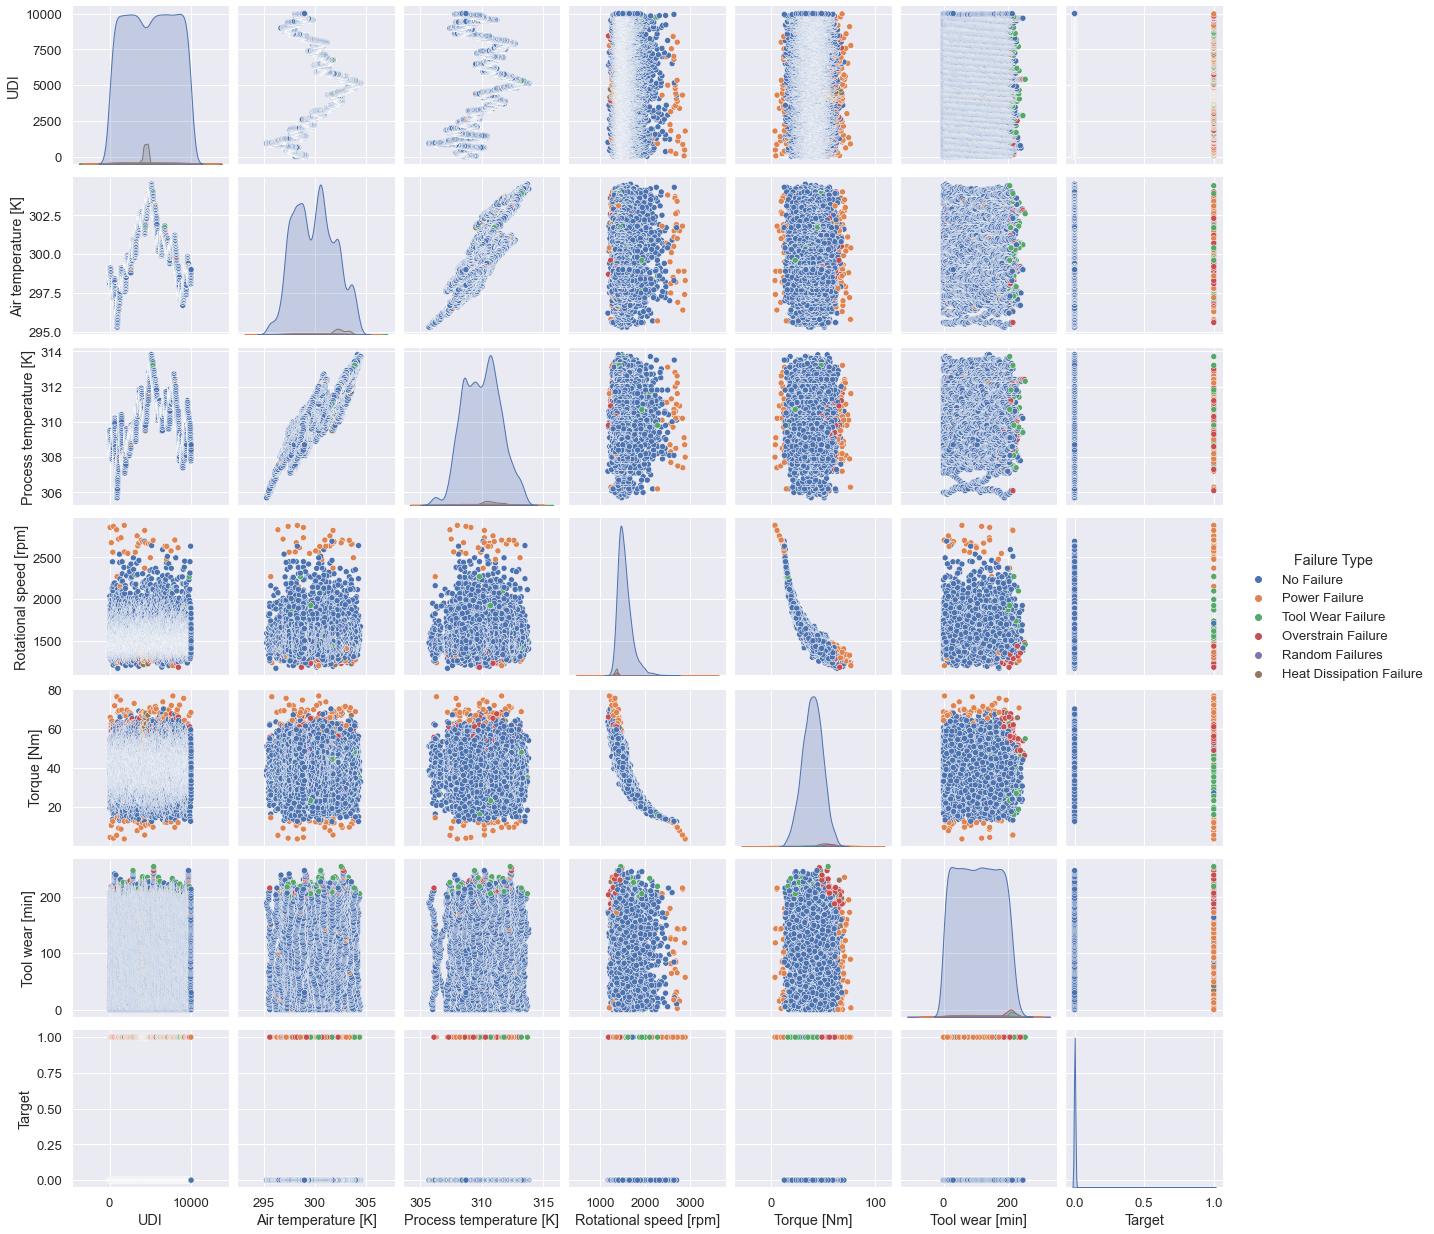

In [16]:
sns.pairplot(data , hue='Failure Type')

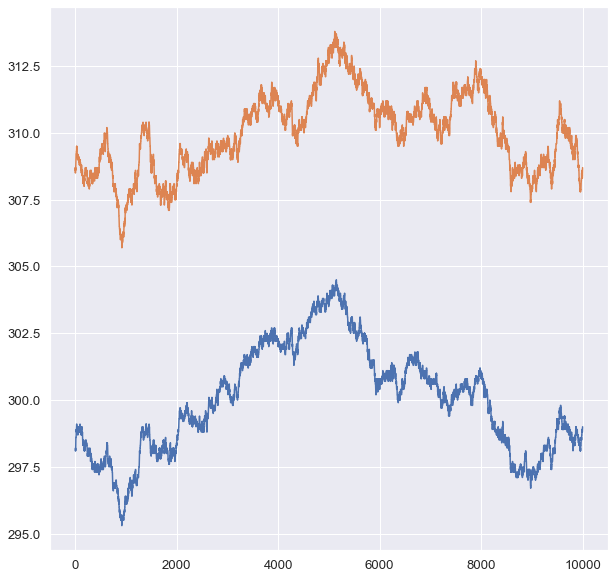

In [17]:
plt.plot(data['Air temperature [K]'])
plt.plot(data['Process temperature [K]'])

In [18]:
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

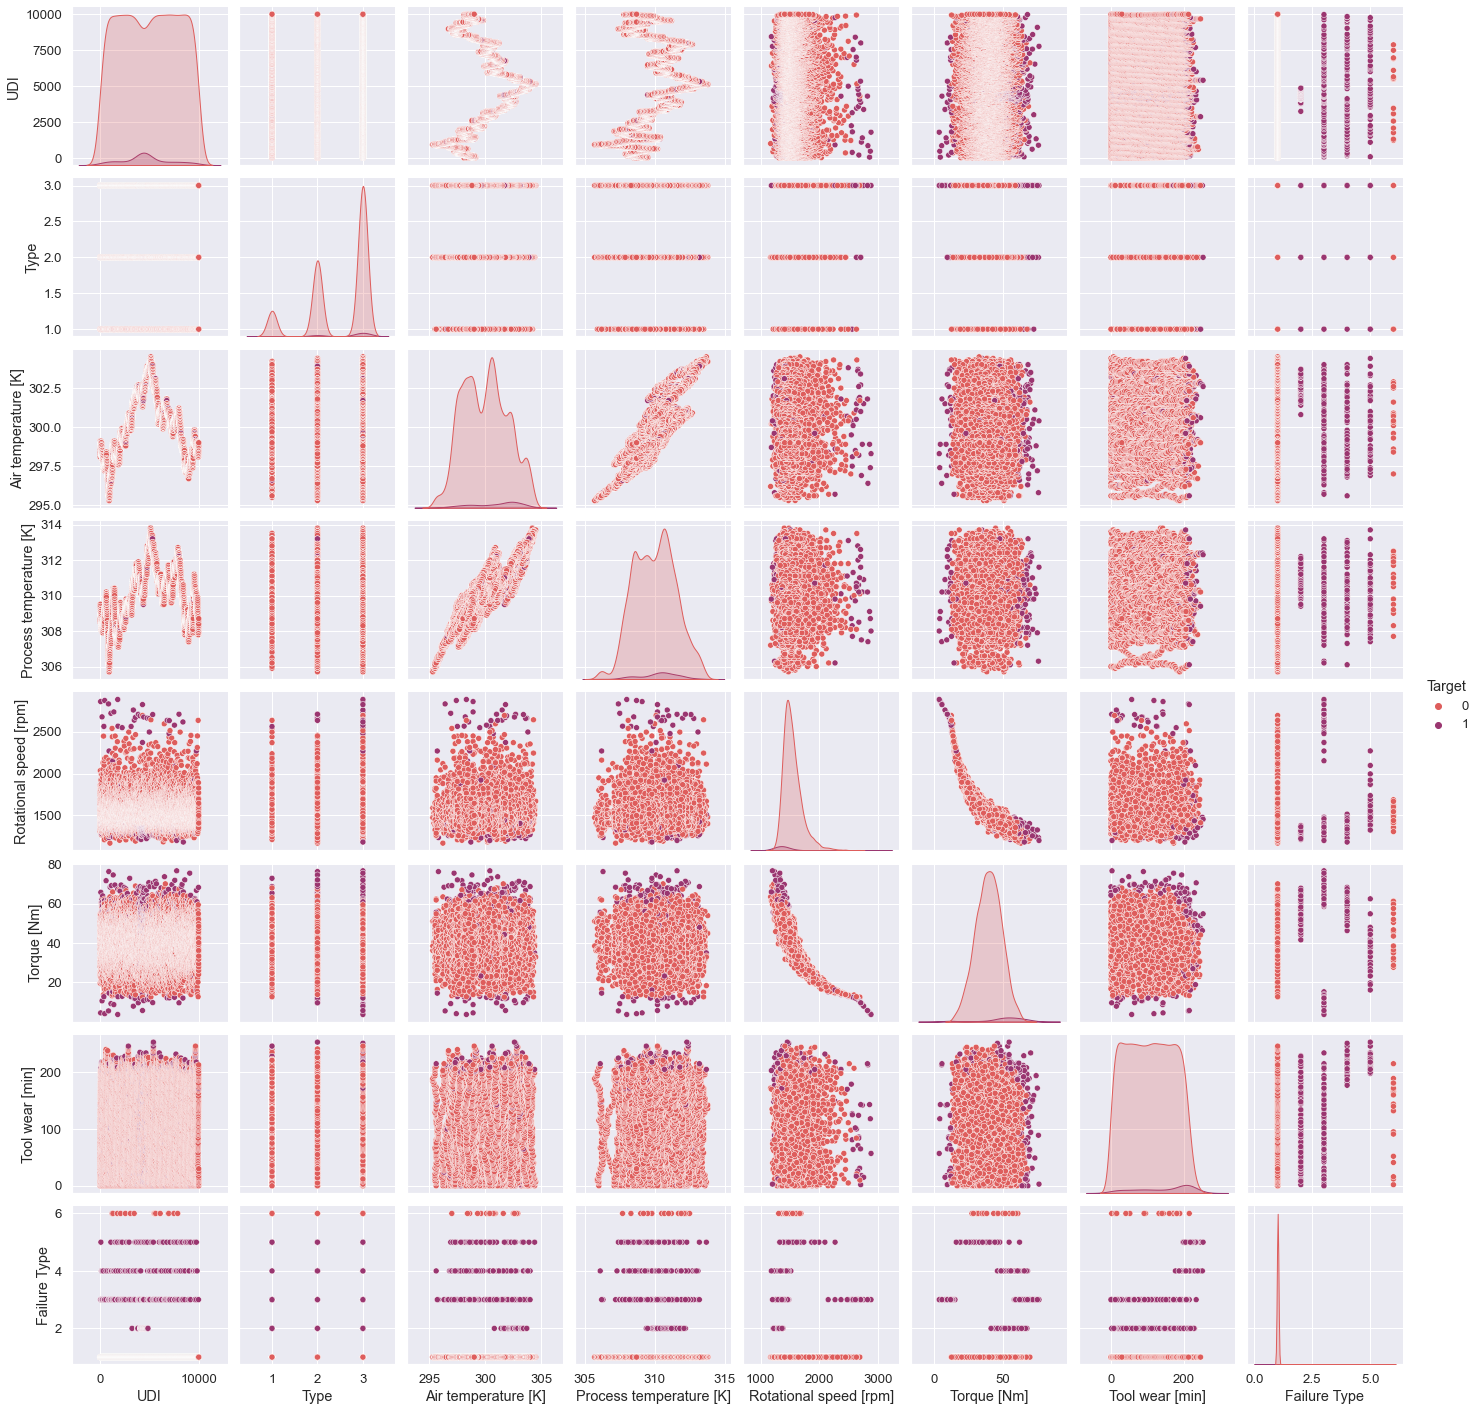

In [42]:
sns.pairplot(data , hue='Target',palette='flare')

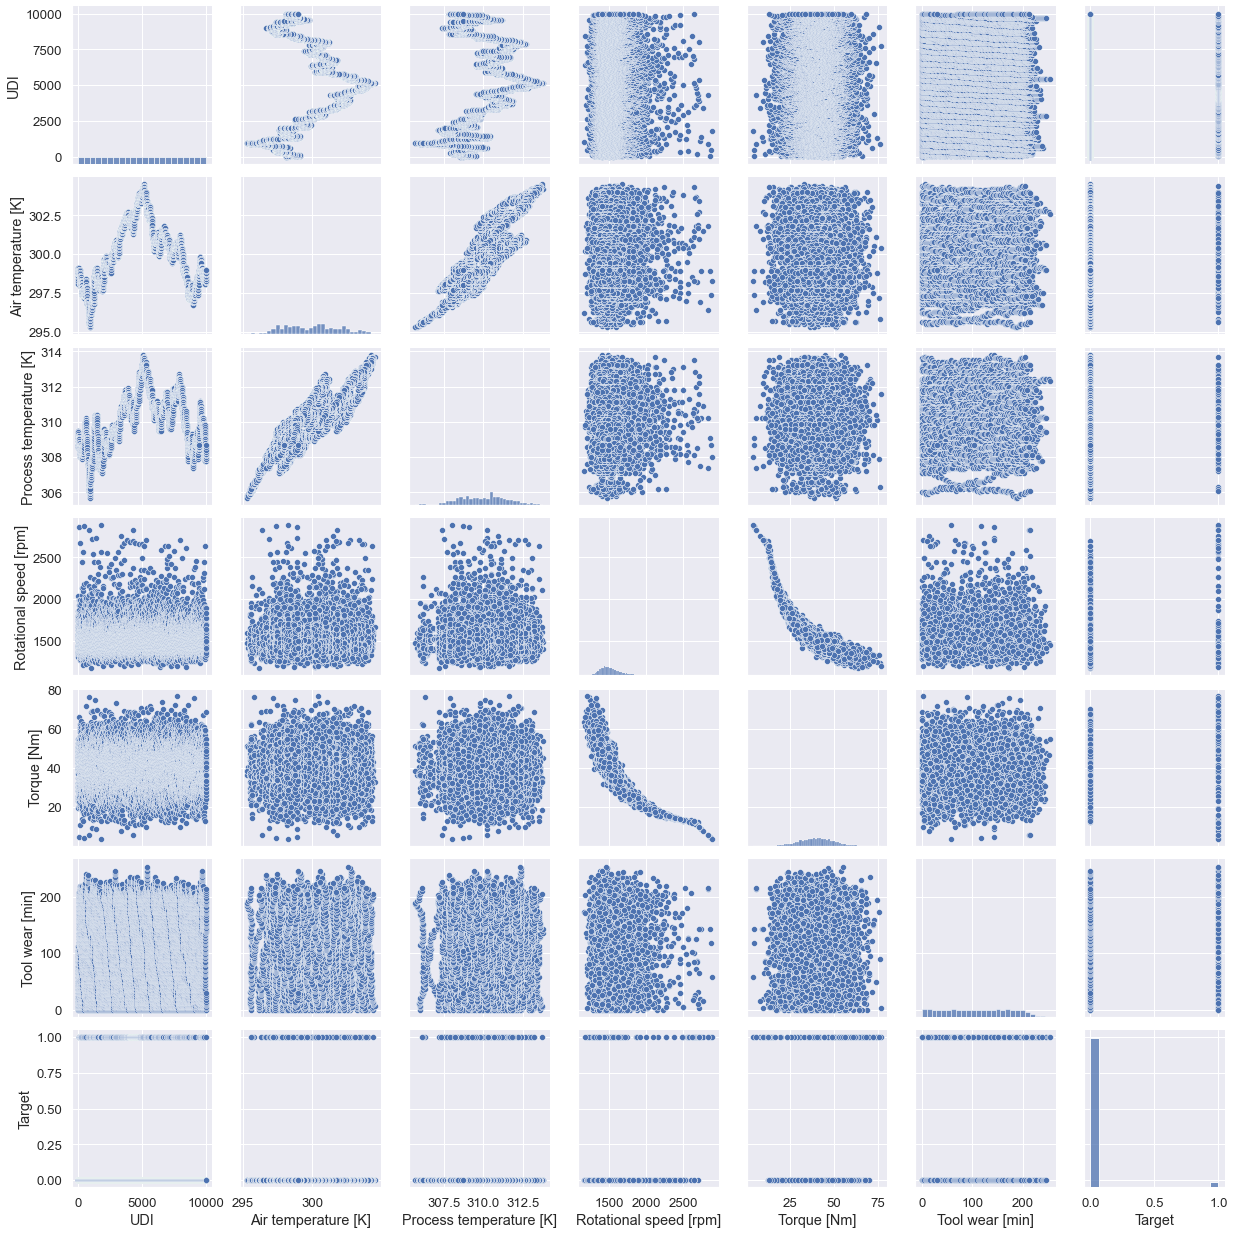

In [20]:
sns.pairplot(data)

In [21]:
data[data['Target'] == 1]

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
50      51     L47230    L                298.9                    309.1   
69      70     L47249    L                298.9                    309.0   
77      78     L47257    L                298.8                    308.9   
160    161     L47340    L                298.4                    308.2   
161    162     L47341    L                298.3                    308.1   
...    ...        ...  ...                  ...                      ...   
9758  9759     L56938    L                298.6                    309.8   
9764  9765     L56944    L                298.5                    309.5   
9822  9823     L57002    L                298.5                    309.4   
9830  9831     L57010    L                298.3                    309.3   
9974  9975     L57154    L                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
50                      2861          4.6              143       1   
69                      1410         65.7              191       1   
77                      1455         41.3              208       1   
160                     1282         60.7              216       1   
161                     1412         52.3              218       1   
...                      ...          ...              ...     ...   
9758                    2271         16.2              218       1   
9764                    1294         66.7               12       1   
9822                    1360         60.9              187       1   
9830                    1337         56.1              206       1   
9974                    1361         68.2              172       1   

            Failure Type  
50         Power Failure  
69         Power Failure  
77     Tool Wear Failure  
160   Overstrain Failure  
161   Overstrain Failure  
...                  ...  
9758   Tool Wear Failure  
9764       Power Failure  
9822  Overstrain Failure  
9830  Overstrain Failure  
9974       Power Failure  

[339 rows x 10 columns]

In [22]:
data[data['Target'] == 1].sample(5)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
1833  1834     L49013    L                297.8                    307.3   
7849  7850     M22709    M                300.3                    311.7   
2166  2167     M17026    M                299.6                    309.2   
4285  4286     L51465    L                301.7                    309.9   
1682  1683     H31096    H                297.9                    307.4   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
1833                    1327         61.0              186       1   
7849                    1374         47.9              222       1   
2166                    1867         23.4              225       1   
4285                    1317         49.0              187       1   
1682                    1604         36.1              225       1   

                  Failure Type  
1833        Overstrain Failure  
7849         Tool Wear Failure  
2166         Tool Wear Failure  
4285  Heat Dissipation Failure  
1682         Tool Wear Failure

In [23]:
data[data['Target'] == 1].value_counts('Type')

Type
L    235
M     83
H     21
dtype: int64

In [24]:
data[data['Target'] == 1].value_counts('Failure Type')

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
dtype: int64

In [25]:
data[data['Target'] == 1].describe()

UDI  Air temperature [K]  Process temperature [K]  \
count   339.000000           339.000000               339.000000   
mean   4647.722714           300.886431               310.290265   
std    2380.540041             2.071473                 1.363686   
min      51.000000           295.600000               306.100000   
25%    3555.000000           299.100000               309.500000   
50%    4442.000000           301.600000               310.400000   
75%    5971.000000           302.500000               311.200000   
max    9975.000000           304.400000               313.700000   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
count              339.000000   339.000000       339.000000   339.0  
mean              1496.486726    50.168142       143.781711     1.0  
std                384.943547    16.374498        72.759876     0.0  
min               1181.000000     3.800000         0.000000     1.0  
25%               1326.500000    45.950000        84.500000     1.0  
50%               1365.000000    53.700000       165.000000     1.0  
75%               1421.500000    61.200000       207.500000     1.0  
max               2886.000000    76.600000       253.000000     1.0

In [26]:
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [27]:
size_dict = {'H':1, 
        'M':2, 
        'L':3,}

# apply using map
data['Type'] = data['Type'].map(size_dict)

In [28]:
data

UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860     2                298.1                    308.6   
1         2     L47181     3                298.2                    308.7   
2         3     L47182     3                298.1                    308.5   
3         4     L47183     3                298.2                    308.6   
4         5     L47184     3                298.2                    308.7   
...     ...        ...   ...                  ...                      ...   
9995   9996     M24855     2                298.8                    308.4   
9996   9997     H39410     1                298.9                    308.4   
9997   9998     M24857     2                299.0                    308.6   
9998   9999     H39412     1                299.0                    308.7   
9999  10000     M24859     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [29]:
data.value_counts('Failure Type')

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
dtype: int64

In [30]:
size_dict = {'No Failure':1, 
            'Heat Dissipation Failure':2, 
            'Power Failure':3,
            'Overstrain Failure':4,
            'Tool Wear Failure':5,
            'Random Failures':6
            }

# apply using map
data['Failure Type'] = data['Failure Type'].map(size_dict)

In [31]:
data

UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860     2                298.1                    308.6   
1         2     L47181     3                298.2                    308.7   
2         3     L47182     3                298.1                    308.5   
3         4     L47183     3                298.2                    308.6   
4         5     L47184     3                298.2                    308.7   
...     ...        ...   ...                  ...                      ...   
9995   9996     M24855     2                298.8                    308.4   
9996   9997     H39410     1                298.9                    308.4   
9997   9998     M24857     2                299.0                    308.6   
9998   9999     H39412     1                299.0                    308.7   
9999  10000     M24859     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

      Failure Type  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
9995             1  
9996             1  
9997             1  
9998             1  
9999             1  

[10000 rows x 10 columns]

In [52]:
x = data.drop(['Target','Product ID','Failure Type'], axis=1)
y = data['Target']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [55]:
data

UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860     2                298.1                    308.6   
1         2     L47181     3                298.2                    308.7   
2         3     L47182     3                298.1                    308.5   
3         4     L47183     3                298.2                    308.6   
4         5     L47184     3                298.2                    308.7   
...     ...        ...   ...                  ...                      ...   
9995   9996     M24855     2                298.8                    308.4   
9996   9997     H39410     1                298.9                    308.4   
9997   9998     M24857     2                299.0                    308.6   
9998   9999     H39412     1                299.0                    308.7   
9999  10000     M24859     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

      Failure Type  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
9995             1  
9996             1  
9997             1  
9998             1  
9999             1  

[10000 rows x 10 columns]

In [56]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models = {
    'LR': LinearRegression(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor(),
    'LGR' : LogisticRegression()
}


for name, model in models.items():
    print(f"Model: {name}")
    print("-"*20)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
    print(f"Train R2: {r2_score(y_train, y_pred_train)}")
    print(f"Test R2: {r2_score(y_test, y_pred_test)}")
    print("\n")

Model: LR
--------------------
Train MAE: 0.0781464229230825
Test MAE: 0.07712814097098175
Train RMSE: 0.17025573773500036
Test RMSE: 0.16547570311837373
Train R2: 0.12672242950133106
Test R2: 0.11601858462938541


Model: SVM
--------------------
Train MAE: 0.06570437145762117
Test MAE: 0.06785703997737955
Train RMSE: 0.1359792935291449
Test RMSE: 0.14361171950322135
Train R2: 0.4429497761949458
Test R2: 0.3341836912877091


Model: KNN
--------------------
Train MAE: 0.028549999999999996
Test MAE: 0.0342
Train RMSE: 0.118911731969558
Test RMSE: 0.1475127113166862
Train R2: 0.5740111797587526
Test R2: 0.2975206611570248


Model: DT
--------------------
Train MAE: 0.0
Test MAE: 0.023
Train RMSE: 0.0
Test RMSE: 0.15165750888103102
Train R2: 1.0
Test R2: 0.25748966942148765


Model: RF
--------------------
Train MAE: 0.00856875
Test MAE: 0.024149999999999998
Train RMSE: 0.04012371493269286
Test RMSE: 0.10975381542342845
Train R2: 0.951498958517211
Test R2: 0.6111215134297521


Model: XGB
-

# Finall